<h2 style="font: bold 28px tahoma">Importing Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as exp

# Theses Two Together Used To Get All File From Directory
import os
import glob

# Set Default Options
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:,.3f}'.format

<h2 style="font: bold 28px tahoma">Load All Data in One DataFrame</h2>

In [2]:
my_path = os.getcwd()

# To Get All Months CSV Files From Directory
all_csv_files = glob.glob(os.path.join(my_path, "*.csv"))

# Create Emptry DF To Put all Data Into
df = pd.DataFrame()

# Concating All Data In Our DF
for f in all_csv_files:
    df = pd.concat([df, pd.read_csv(f)])

<h1 style="font: bold 28px tahoma">Data Exploration & Understanding ⛏️</h1>

In [3]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 186850
Columns: 6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

<h2 style="font: bold 28px tahoma">Look at Nan Values!!🧐 </h2>

In [5]:
# Check For Nan Values
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
# Display All Records That Has No Data. Only Has Nan Values!!
df[df.isna().all(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop Records That All Cells Are Nan Valus
df.dropna(how="all", inplace=True)

In [8]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

<h2 style="font: bold 28px tahoma">Look Deeper at Each Column & Cleaning 🧹</h2>

## Firstly: *Clean The Columns Name From Any Spaces*

In [9]:
df.columns = df.columns.str.replace(" ", "_")

### ♣ Order Id Column

In [10]:
df["Order_ID"].value_counts()

Order ID    355
160873        5
289117        4
226625        4
277875        4
           ... 
158177        1
158178        1
158179        1
158180        1
259357        1
Name: Order_ID, Length: 178438, dtype: int64

In [12]:
# Look At All Records When Value of Order Id Column = 'Order Id'
filt = df["Order_ID"] == "Order ID"

df[filt]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


<h2 style="color: #FF5B22; font: bold 22px tahoma">We Got Unexpected Results!! 🤔</h2>
<p style="color: brown; font: bold 18px tahoma">There are Many Cells That <u>Do Not Have Any Meaning</u>. Just contain the name of the column over and over!.!</p>

In [13]:
# Drop All Records That Contain The Column Name Itsel As a Value
df.drop(df[filt].index, inplace=True)

In [14]:
df["Order_ID"].value_counts()

160873    5
277875    4
295681    4
289117    4
165665    4
         ..
158076    1
158077    1
158078    1
158079    1
259357    1
Name: Order_ID, Length: 175449, dtype: int64

### Product Column 👔

In [15]:
df["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [16]:
different_product = df["Product"].nunique()
print(f"Number of Different Products: {different_product}")

Number of Different Products: 19


In [17]:
df["Product"].value_counts()

USB-C Charging Cable          21523
Lightning Charging Cable      21308
AAA Batteries (4-pack)        20293
AA Batteries (4-pack)         20214
Wired Headphones              18552
Apple Airpods Headphones      15273
Bose SoundSport Headphones    13109
27in FHD Monitor               7386
iPhone                         6725
27in 4K Gaming Monitor         6122
34in Ultrawide Monitor         6058
Google Phone                   5433
Flatscreen TV                  4705
Macbook Pro Laptop             4641
ThinkPad Laptop                4052
20in Monitor                   4032
Vareebadd Phone                2020
LG Washing Machine              649
LG Dryer                        640
Name: Product, dtype: int64

### Quantity Ordered Column 🛒

In [18]:
df["Quantity_Ordered"].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [19]:
df["Quantity_Ordered"].value_counts()

1    165650
2     13082
3      2870
4       789
5       232
6        80
7        24
8         5
9         3
Name: Quantity_Ordered, dtype: int64

In [20]:
df["Quantity_Ordered"].dtype

dtype('O')

In [21]:
# Converting Quantity_Ordered Into Integer Data Type
df["Quantity_Ordered"] = df["Quantity_Ordered"].astype(np.int8)
df["Quantity_Ordered"].dtype

dtype('int8')

### Price_Each Column 💰💵

In [22]:
df["Price_Each"].dtype

dtype('O')

In [23]:
# Converting Price Into Float Data Type
df["Price_Each"] = df["Price_Each"].astype(np.float32)

In [24]:
df["Price_Each"].unique()

array([  11.95,   99.99,  600.  ,   11.99, 1700.  ,   14.95,  389.99,
          3.84,  150.  ,    2.99,  700.  ,  300.  ,  149.99,  109.99,
        999.99,  400.  ,  379.99], dtype=float32)

In [25]:
df["Price_Each"].describe()

count   182,735.000
mean        184.315
std         332.671
min           2.990
25%          11.950
50%          14.950
75%         150.000
max       1,700.000
Name: Price_Each, dtype: float64

### Order_Date Column 📆

In [26]:
df["Order_Date"].dtype

dtype('O')

In [27]:
# Convertign Date Column Into DateTime
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

In [28]:
print(f'First Date: {df["Order_Date"].min()}')
print(f'Last  Date: {df["Order_Date"].max()}')
print(df["Order_Date"].max() - df["Order_Date"].min())

First Date: 2019-01-01 03:07:00
Last  Date: 2020-01-01 05:13:00
365 days 02:06:00


### Set The Order_Id as The DataFrame Index

In [29]:
df.set_index("Order_ID", inplace=True)

In [30]:
df.index = df.index.astype(int)

In [31]:
df.head(10)

,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
Order_ID,,,,,
176558,USB-C Charging Cable,2,11.950,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
176559,Bose SoundSport Headphones,1,99.990,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600.000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
176561,Wired Headphones,1,11.990,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
176562,USB-C Charging Cable,1,11.950,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016"
176563,Bose SoundSport Headphones,1,99.990,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101"
176564,USB-C Charging Cable,1,11.950,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301"
176565,Macbook Pro Laptop,1,"1,700.000",2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016"


In [32]:
df.dtypes

Product                     object
Quantity_Ordered              int8
Price_Each                 float32
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

<h2 style="font: bold 28px tahoma">Check For Duplicated Records</h2>

In [33]:
# Check Duplicated Id
df.index.duplicated().sum()

7286

In [34]:
df[df.index.duplicated()].head(10)

,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
Order_ID,,,,,
176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
176574,USB-C Charging Cable,1,11.950,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001"
176585,Bose SoundSport Headphones,1,99.990,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215"
176586,Google Phone,1,600.000,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016"
176672,USB-C Charging Cable,1,11.950,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001"
176681,ThinkPad Laptop,1,999.990,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101"
176689,AAA Batteries (4-pack),2,2.990,2019-04-24 17:15:00,"659 Lincoln St, New York City, NY 10001"
176739,Google Phone,1,600.000,2019-04-05 17:38:00,"730 6th St, Austin, TX 73301"
176774,USB-C Charging Cable,1,11.950,2019-04-25 15:06:00,"372 Church St, Los Angeles, CA 90001"


In [35]:
# Check For Duplicated Records
df.loc[176689]

,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
Order_ID,,,,,
176689,Bose SoundSport Headphones,1,99.990,2019-04-24 17:15:00,"659 Lincoln St, New York City, NY 10001"
176689,AAA Batteries (4-pack),2,2.990,2019-04-24 17:15:00,"659 Lincoln St, New York City, NY 10001"


<p style="color: #FFDD83; background-color: #222; padding: 15px; font: bold 15px arial;">
    ► So, it's not really duplicated, but the same user ordered multiple times a two different products.</p>

<h2 style="font: bold 28px tahoma">Before Analysis! Lets Select & Add Columns ⛏️😇</h2>

## Add Month Column 📅
#### ► Because The Whole Data Is in The Sme Year, But For 12 Months, we will add another column that contains the month number

In [36]:
df["Month"] = df["Order_Date"].dt.month

In [37]:
df.head()

,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
Order_ID,,,,,,
176558,USB-C Charging Cable,2,11.950,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
176559,Bose SoundSport Headphones,1,99.990,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
176560,Google Phone,1,600.000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
176561,Wired Headphones,1,11.990,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


## ► Get The State From Whole Address!! 🌎
#### <u style="color:orangered">Important Notice</u>: The Purchase_Address Consists of 3 Parts → (Street, City, State)

In [38]:
df["State"] = df["Purchase_Address"].str.split(", ", expand=True)[2]\
.apply(lambda x: x[:2])

In [39]:
df.head()

,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,State
Order_ID,,,,,,,
176558,USB-C Charging Cable,2,11.950,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,TX
176559,Bose SoundSport Headphones,1,99.990,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,MA
176560,Google Phone,1,600.000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA
176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA
176561,Wired Headphones,1,11.990,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,CA


In [44]:
states_url = "https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv"
states_df = pd.read_csv(states_url, index_col="Abbreviation")

def state_full_name(state_abbreviation):
    """
        Function Used To Search for the full name of the state abbreviation
        • Take Only one Arg: The State's Abbreviation [MA, CA, TX]
        → Return The State's Full Name
    """
    return states_df.loc[state_abbreviation.upper().strip()][0]

In [45]:
state_full_name("CA")

'California'

## Get The Total Sales For Each Recore
Total Sale  = Price_Each  * Quantity

In [43]:
df["Price_Total"] = df["Price_Each"] * df["Quantity_Ordered"]

In [44]:
df.head(10)

,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,State,Price_Total
Order_ID,,,,,,,,
176558,USB-C Charging Cable,2,11.950,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,TX,23.900
176559,Bose SoundSport Headphones,1,99.990,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,MA,99.990
176560,Google Phone,1,600.000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,600.000
176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,11.990
176561,Wired Headphones,1,11.990,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,CA,11.990
176562,USB-C Charging Cable,1,11.950,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,CA,11.950
176563,Bose SoundSport Headphones,1,99.990,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,WA,99.990
176564,USB-C Charging Cable,1,11.950,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,GA,11.950
176565,Macbook Pro Laptop,1,"1,700.000",2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,CA,"1,700.000"


## Selecting Our Columns To Work With

In [46]:
df = df[["Order_Date", "Month", "State", "Product", "Quantity_Ordered", "Price_Each", "Price_Total"]].copy()

In [47]:
df.sample(10, random_state=8)

,Order_Date,Month,State,Product,Quantity_Ordered,Price_Each,City
Order_ID,,,,,,,
178941,2019-04-06 10:22:00,4,CA,Apple Airpods Headphones,1,150.000,San Francisco
316209,2019-12-18 13:04:00,12,TX,Bose SoundSport Headphones,1,99.990,Austin
190047,2019-04-23 13:45:00,4,NY,USB-C Charging Cable,1,11.950,New York City
290776,2019-11-26 10:42:00,11,TX,AA Batteries (4-pack),1,3.840,Austin
167589,2019-03-10 21:29:00,3,ME,USB-C Charging Cable,1,11.950,Portland
291130,2019-11-02 23:58:00,11,NY,Apple Airpods Headphones,1,150.000,New York City
305885,2019-12-24 18:07:00,12,CA,iPhone,1,700.000,San Francisco
195582,2019-05-03 19:08:00,5,TX,Lightning Charging Cable,1,14.950,Dallas
280201,2019-11-15 15:33:00,11,NY,Apple Airpods Headphones,1,150.000,New York City


# Finally!! Time To Ask Question & Get Insights 🤩📊

## ♠ *Which Month Has The Highest Sales?*

In [47]:
month_groupped = df.groupby("Month")["Price_Total"].sum()
month_groupped

Month
1    1,786,511.250
2    2,158,127.500
3    2,755,969.500
4    3,336,376.500
5    3,101,881.000
6    2,524,465.000
7    2,587,445.000
8    2,191,698.250
9    2,050,361.250
10   3,679,254.250
11   3,149,785.000
12   4,557,905.500
Name: Price_Total, dtype: float32

In [48]:
month_groupped.nlargest(1)

Month
12   4,557,905.500
Name: Price_Total, dtype: float32

In [49]:
months = month_groupped.index
sales = month_groupped

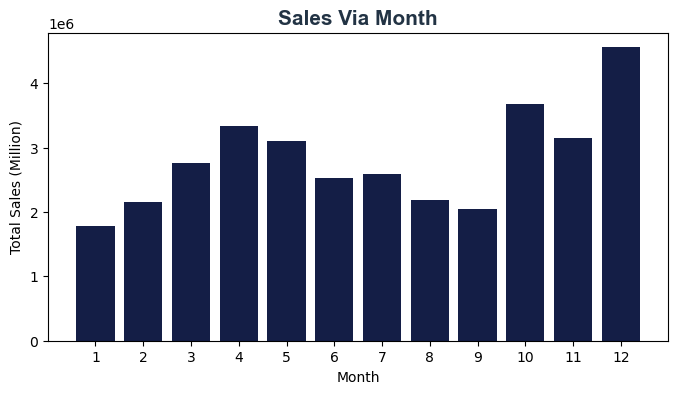

In [50]:
# Bar Plot
plt.figure(figsize=(8, 4))

plt.bar(months, sales, color= "#141E46")

plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Total Sales (Million)")
plt.title("Sales Via Month", fontdict={"fontfamily": "arial", 
                                       "fontsize": "15", 
                                       "fontweight":"bold", 
                                       "color": "#234"})

plt.show()

## ♠ *Which Months Have Sales Greater Than The Median of Total Sales?*

In [51]:
f"{month_groupped.median():,.3f}"

'2,671,707.250'

In [52]:
filt = month_groupped > month_groupped.median()
month_groupped[filt]

Month
3    2,755,969.500
4    3,336,376.500
5    3,101,881.000
10   3,679,254.250
11   3,149,785.000
12   4,557,905.500
Name: Price_Total, dtype: float32

### ► The Graph Tells a Lot 📈📈

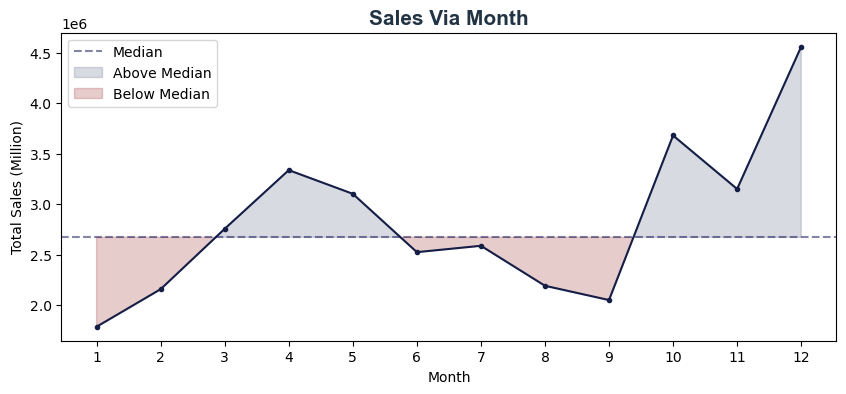

In [53]:
# Line Plot
plt.figure(figsize=(10, 4))

plt.plot(months, sales, color= "#141E46", marker= ".")

# Median Line
plt.axhline(month_groupped.median(), 
            color="#070A52", linestyle="--",
            alpha=0.5, label="Median")

# Above Median Line acoording to condition
plt.fill_between(months, sales, month_groupped.median(),
                     color="#3C486B", alpha=0.2,
                    where = (sales >= month_groupped.median()), 
                     interpolate=True, 
                    label = "Above Median")

# Below Median Line acoording to condition
plt.fill_between(months, sales, month_groupped.median(),
                 color="darkred", alpha=0.2,
                where = (sales < month_groupped.median()), 
                 interpolate=True, label = "Below Median")

plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Total Sales (Million)")
plt.legend()
plt.title("Sales Via Month", fontdict={"fontfamily": "arial", 
                                       "fontsize": "15", 
                                       "fontweight":"bold", 
                                       "color": "#234"})
plt.show()

## ♠ *Which Top 5 States Have The Highest Total Sales?*

In [54]:
top_5_states = df.groupby("State")["Price_Total"].sum().nlargest(5)
top_5_states

State
CA   13,478,161.000
NY    4,581,659.000
TX    4,504,539.000
MA    3,604,080.750
GA    2,741,642.000
Name: Price_Total, dtype: float32

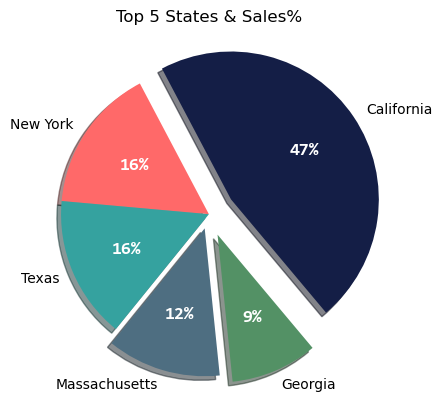

In [55]:
vals = top_5_states.to_list()

# Get The Full Name Instead of Abbreevaition
labels = [state_full_name(x) for x in top_5_states.index]

colors = ["#141E46", "#FF6969", "#35A29F", "#4E6E81", "#539165"]

_, _, fig = plt.pie(vals, labels = labels, shadow=True,
                         autopct="%0.0f%%", colors = colors,
                        startangle=-50, explode=[0.18, 0, 0, 0.1, 0.15])

#  Just Some Formatting of Text to the Pie Chart
for autotext in fig:
    autotext.set_fontfamily("consolas")
    autotext.set_fontsize("13")
    autotext.set_color("white")
    autotext.set_fontweight("bold")

plt.title("Top 5 States & Sales%")
plt.show()

## For Each State Get The Total Sales Per Each Quarter!!

In [56]:
state_quarter = df.pivot_table(index= df["State"], 
                               columns = df["Order_Date"].dt.quarter, 
                               values="Price_Total", aggfunc="sum")
# Change The Columns Name
state_quarter.columns = ["Q1", "Q2", "Q3", "Q4"]

In [57]:
state_quarter

,Q1,Q2,Q3,Q4
State,,,,
CA,"2,691,476.250","3,642,268.000","2,673,304.750","4,471,111.500"
GA,"543,513.375","727,645.750","540,508.750","929,974.188"
MA,"709,542.062","924,679.125","759,881.500","1,209,978.125"
ME,"81,649.828","129,253.883","96,087.547","137,119.266"
NY,"913,068.500","1,189,394.750","940,820.312","1,538,375.250"
OR,"360,615.969","500,632.250","353,857.125","617,433.312"
TX,"885,030.938","1,157,525.375","920,826.875","1,541,156.000"
WA,"515,711.094","691,323.188","544,217.500","941,796.812"


## What Is The Top 10 Products ?!?

In [58]:
top_10_products = df.groupby("Product")["Quantity_Ordered"].sum().sort_values(ascending=False)
top_10_products

Product
AAA Batteries (4-pack)        30487
AA Batteries (4-pack)         27148
USB-C Charging Cable          23555
Lightning Charging Cable      22841
Wired Headphones              20201
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
27in FHD Monitor               7429
iPhone                         6732
27in 4K Gaming Monitor         6134
34in Ultrawide Monitor         6076
Google Phone                   5440
Flatscreen TV                  4724
Macbook Pro Laptop             4645
20in Monitor                   4058
ThinkPad Laptop                4054
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity_Ordered, dtype: int64

In [59]:
print("Top 10 Products: ")
top_10_products.head()

Top 10 Products: 


Product
AAA Batteries (4-pack)      30487
AA Batteries (4-pack)       27148
USB-C Charging Cable        23555
Lightning Charging Cable    22841
Wired Headphones            20201
Name: Quantity_Ordered, dtype: int64

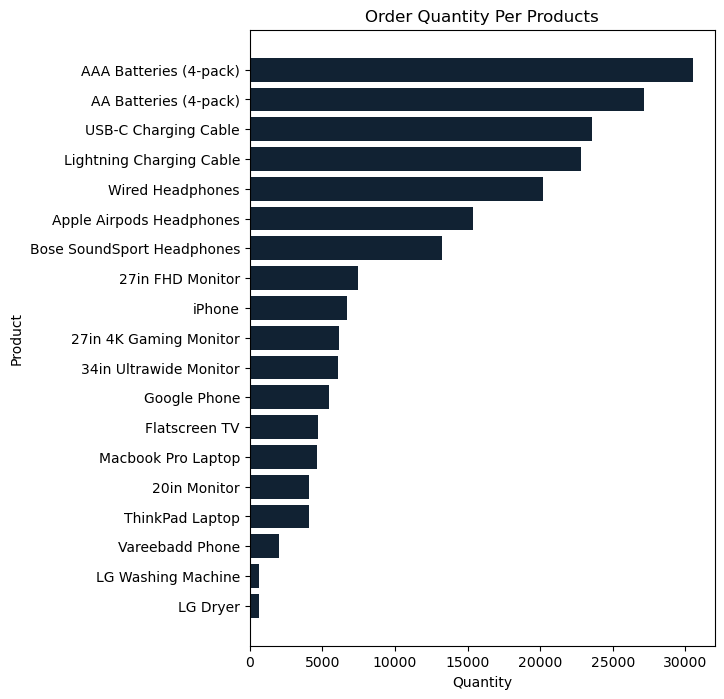

In [60]:
product = top_10_products.index[::-1]
quantity = top_10_products.to_list()[::-1]

plt.figure(figsize=(6, 8))

fig = plt.barh(product, quantity, color = "#123")
plt.title("Order Quantity Per Products")
plt.xlabel('Quantity')
plt.ylabel("Product")
plt.show()